In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
import random

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [4]:
titanic_train = pd.read_csv("C:/Users/madhu/OneDrive/Desktop/titanic/train.csv")
titanic_test = pd.read_csv("C:/Users/madhu/OneDrive/Desktop/titanic/test.csv")

In [5]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Finding if the columns contains missing values and how  many missing values
c1 = titanic_train['PassengerId'].isna().sum()
print("C1", c1)
c2 = titanic_train['Survived'].isna().sum()
print("C2", c2)
c3 = titanic_train['Pclass'].isna().sum()
print("C3", c3)
c4 = titanic_train['Name'].isna().sum()
print("C4", c4)
c5 = titanic_train['Sex'].isna().sum()
print("C5", c5)
c6 = titanic_train['Age'].isna().sum()
print("C6", c6)
c7 = titanic_train['SibSp'].isna().sum()
print("C7", c7)
c8 = titanic_train['Parch'].isna().sum()
print("C8", c8)
c9 = titanic_train['Ticket'].isna().sum()
print("C9", c9)
c10 = titanic_train['Fare'].isna().sum()
print("C10", c10)
c11 = titanic_train['Cabin'].isna().sum()
print("C11", c11)
c12 = titanic_train['Embarked'].isna().sum()
print("C12", c12)

c11 = titanic_test['PassengerId'].isna().sum()
print("C11", c11)
c33 = titanic_test['Pclass'].isna().sum()
print("C33", c33)
c44 = titanic_test['Name'].isna().sum()
print("C4", c44)
c55 = titanic_test['Sex'].isna().sum()
print("C5", c55)
c66 = titanic_test['Age'].isna().sum()
print("C6", c66)
c77 = titanic_test['SibSp'].isna().sum()
print("C7", c77)
c88 = titanic_test['Parch'].isna().sum()
print("C8", c88)
c99 = titanic_test['Ticket'].isna().sum()
print("C9", c99)
c101 = titanic_test['Fare'].isna().sum()
print("C10", c101)
c111 = titanic_test['Cabin'].isna().sum()
print("C11", c111)
c122 = titanic_test['Embarked'].isna().sum()
print("C12", c122)


C1 0
C2 0
C3 0
C4 0
C5 0
C6 177
C7 0
C8 0
C9 0
C10 0
C11 687
C12 2
C11 0
C33 0
C4 0
C5 0
C6 86
C7 0
C8 0
C9 0
C10 1
C11 327
C12 0


In [8]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
mode_age = titanic_train['Age'].mode()[0]
titanic_train['Age'].fillna(mode_age,inplace=True)

In [10]:
mode_age_test = titanic_test['Age'].mode()[0]
titanic_test['Age'].fillna(mode_age_test,inplace=True)

In [11]:
 titanic_train['Age'].isna().sum()

0

In [12]:
 titanic_test['Age'].isna().sum()

0

In [13]:
# Create a new column 'Cabin_Missing' to indicate missing values in 'Cabin'
titanic_train['Cabin_Missing'] = titanic_train['Cabin'].isnull().astype(int)

In [14]:
titanic_test['Cabin_Missing'] = titanic_test['Cabin'].isnull().astype(int)

In [15]:
mode_embarked = titanic_train['Embarked'].mode()[0]
titanic_train['Embarked'].fillna(mode_embarked,inplace=True)

In [16]:
print(mode_embarked)

S


In [17]:
 titanic_train['Embarked'].isna().sum()

0

In [18]:
titanic_train.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [19]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Missing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [20]:
titanic_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Missing
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,1


In [21]:
titanic_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [22]:
label_encoder = LabelEncoder()
titanic_train['Sex_Encoded'] = label_encoder.fit_transform(titanic_train['Sex'])

In [23]:
titanic_test['Sex_Encoded'] = label_encoder.fit_transform(titanic_test['Sex'])

In [24]:
titanic_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [25]:
label_encoder = LabelEncoder()
titanic_train['Embarked_Encoded'] = label_encoder.fit_transform(titanic_train['Embarked'])

In [26]:
titanic_test['Embarked_Encoded'] = label_encoder.fit_transform(titanic_test['Embarked'])

In [27]:
columns_to_drop = ['Embarked','Sex','Name','Ticket','Cabin']
new_titanic_train = titanic_train.drop(columns_to_drop,axis=1)

In [28]:
columns_drop = ['Embarked','Sex','Name','Ticket','Cabin']
new_titanic_test = titanic_test.drop(columns_drop,axis=1)

In [29]:
new_titanic_train.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_Missing,Sex_Encoded,Embarked_Encoded
0,1,0,3,22.0,1,0,7.2500,1,1,2
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,2
3,4,1,1,35.0,1,0,53.1000,0,0,2
4,5,0,3,35.0,0,0,8.0500,1,1,2
5,6,0,3,24.0,0,0,8.4583,1,1,1
6,7,0,1,54.0,0,0,51.8625,0,1,2
7,8,0,3,2.0,3,1,21.0750,1,1,2
8,9,1,3,27.0,0,2,11.1333,1,0,2
9,10,1,2,14.0,1,0,30.0708,1,0,0


In [30]:
new_titanic_test.head(10)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin_Missing,Sex_Encoded,Embarked_Encoded
0,892,3,34.5,0,0,7.8292,1,1,1
1,893,3,47.0,1,0,7.0000,1,0,2
2,894,2,62.0,0,0,9.6875,1,1,1
3,895,3,27.0,0,0,8.6625,1,1,2
4,896,3,22.0,1,1,12.2875,1,0,2
5,897,3,14.0,0,0,9.2250,1,1,2
6,898,3,30.0,0,0,7.6292,1,0,1
7,899,2,26.0,1,1,29.0000,1,1,2
8,900,3,18.0,0,0,7.2292,1,0,0
9,901,3,21.0,2,0,24.1500,1,1,2


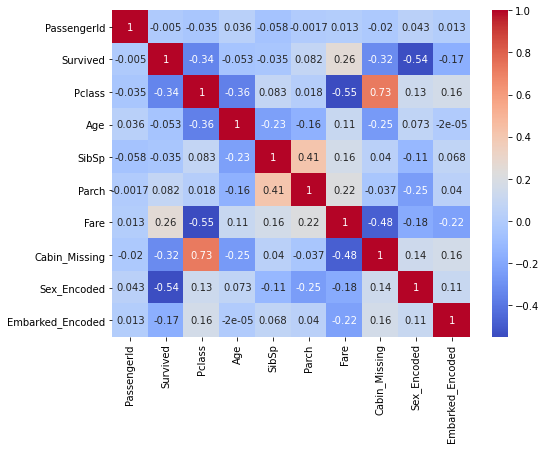

In [31]:
correlation_matrix=new_titanic_train.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

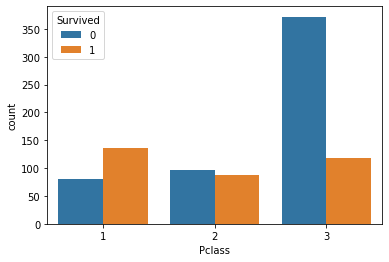

In [32]:
sns.countplot(x='Pclass',hue='Survived',data=new_titanic_train)
plt.show()

In [33]:
# Nearly  70% of the first class were saved
# Nearly 50 % of the second class were saved
# Nearly 25% of the third class were saved


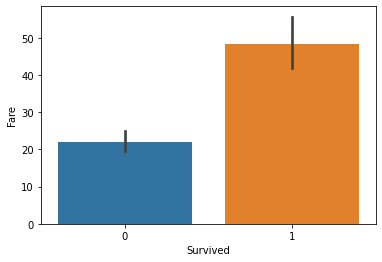

<Figure size 576x432 with 0 Axes>

In [34]:
sns.barplot(x='Survived',y='Fare',data=new_titanic_train)
plt.figure(figsize=(8,6))
plt.show()

In [35]:
# Most of the people who paid less than 20 did not survive

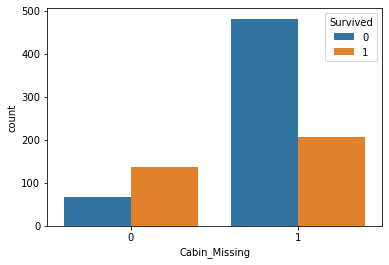

In [36]:
sns.countplot(x='Cabin_Missing',hue='Survived',data=new_titanic_train)
plt.show()

In [37]:
# Nearly 65% of the people whose cabin is listed survived
# nearly 30% of the people survived whose cabin were not listed

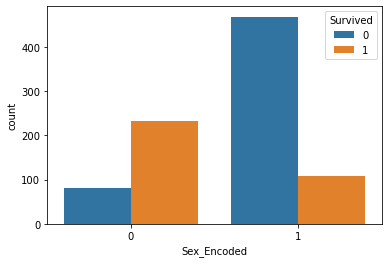

In [38]:
sns.countplot(x='Sex_Encoded',hue='Survived',data=new_titanic_train)
plt.show()

In [39]:
# Nearly 17% of the male survived
# Nearly 70% of the female survived

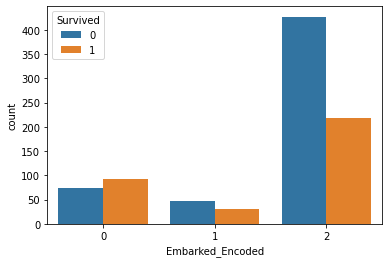

In [40]:
sns.countplot(x='Embarked_Encoded',hue='Survived',data=new_titanic_train)
plt.show()

In [41]:
# Southampton S - 2
# Cherbourg C - 1
# Queenstown Q - 0
# Nearly 58% of the Queenstown survived 
# Nearly 45% of the Cherbourg survived
# Nearly 35% of the Southampton survived

In [42]:
X = new_titanic_train.drop(['PassengerId','Survived'],axis=1)
y = new_titanic_train['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train,y_train)


LogisticRegression(solver='liblinear')

In [43]:
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
print(classification_report(y_test, y_pred))

0.7932960893854749
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [44]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
dec_y_pred = dec_tree.predict(X_test)
accuracy_dec = accuracy_score(y_test,dec_y_pred)
print(accuracy_dec)
print(classification_report(y_test, dec_y_pred))

0.7597765363128491
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       105
           1       0.71      0.72      0.71        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



In [46]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [47]:
rf_y_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test,rf_y_pred)
print(accuracy_rf)
print(classification_report(y_test, rf_y_pred))

0.8044692737430168
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [48]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [49]:
# Make predictions on the test set
xgb_y_pred = xgb_model.predict(X_test)

# Calculate the accuracy of the XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print("XGBoost Accuracy:", xgb_accuracy)

# Generate a classification report for the XGBoost model
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_y_pred))


XGBoost Accuracy: 0.776536312849162
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.74      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [50]:
data_test = new_titanic_test.drop('PassengerId',axis=1)

In [51]:
data_test.isna().sum()

Pclass              0
Age                 0
SibSp               0
Parch               0
Fare                1
Cabin_Missing       0
Sex_Encoded         0
Embarked_Encoded    0
dtype: int64

In [52]:
median_fare = data_test['Fare'].median()
data_test['Fare'].fillna(median_fare, inplace=True)

In [53]:
data_test.isna().sum()

Pclass              0
Age                 0
SibSp               0
Parch               0
Fare                0
Cabin_Missing       0
Sex_Encoded         0
Embarked_Encoded    0
dtype: int64

In [54]:
y_prediction = rf_model.predict(data_test)

In [55]:
titanic_dataset = pd.DataFrame({'PassengerId': new_titanic_test[['PassengerId']].values[:, 0],
                             'Survived': y_prediction})

In [56]:
titanic_dataset.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [57]:
titanic_dataset.to_csv('C:/Users/madhu/OneDrive/Desktop/Prediction.csv',index=False)